# Understanding Classification in ML

**Supervised machine learning** techniques involve training a model to operate on a set of _features_ and predict a _label_ using a dataset that incluses some already known label values. 

You can think of this function like this, in which **_y_** represents the label we want to predict and **_X_** represents the vector of features the model uses to predict it.

$$y = f([x_1, x_2, x_3, ...])$$


**Classificatioin** is a form of supervised machine learning algorithm in which you train a model to use the features (the _x_ value of our function) to predict a label(_y_) that calculates the probability of the observed case belonging to each of a number of possible classes, and predicting an appropriate label. 

The simplest form of classification is _binary classification_, in which the label is 0 or 1, representing two classes; for example "True" or "False"; "Internal" or "External" and so on.

# Binary Classification



Load the dataset. This data consists of diagnostic information about some patients who have been tested for diabetes. note that the final column in the dataset (**Diabetic**) contains the value **_0_** for patients who tested negative for diabetes, and **_1_** for patients who tested positive. This is the label that we will train our model to predict; most of the other columns (**Pregnancies**,**PlasmaGlucose**,**DiastolicBloodPressure**, and so on) are the features we will use to predict the **Diabetic** label.

In [26]:
import pandas as pd

# load the diabetes dataset for training
diabetes = pd.read_csv('./../../data/diabetes.csv')
diabetes.head()

,PatientID,Pregnancies,PlasmaGlucose,DiastolicBloodPressure,TricepsThickness,SerumInsulin,BMI,DiabetesPedigree,Age,Diabetic
0,1354778,0,171,80,34,23,43.509726,1.213191,21,0
1,1147438,8,92,93,47,36,21.240576,0.158365,23,0
2,1640031,7,115,47,52,35,41.511523,0.079019,23,0
3,1883350,9,103,78,25,304,29.582192,1.282870,43,1
4,1424119,1,85,59,27,35,42.604536,0.549542,22,0


Seperate the features X and the label y:

In [27]:
features = diabetes.columns.drop(['PatientID', 'Diabetic'])
label = 'Diabetic'

X, y = diabetes[features].values, diabetes[label].values

print(X, y)

[[0.00000000e+00 1.71000000e+02 8.00000000e+01 ... 4.35097259e+01
  1.21319135e+00 2.10000000e+01]
 [8.00000000e+00 9.20000000e+01 9.30000000e+01 ... 2.12405757e+01
  1.58364981e-01 2.30000000e+01]
 [7.00000000e+00 1.15000000e+02 4.70000000e+01 ... 4.15115235e+01
  7.90185680e-02 2.30000000e+01]
 ...
 [0.00000000e+00 9.30000000e+01 8.90000000e+01 ... 1.86906831e+01
  4.27048955e-01 2.40000000e+01]
 [0.00000000e+00 1.32000000e+02 9.80000000e+01 ... 1.97916451e+01
  3.02257208e-01 2.30000000e+01]
 [3.00000000e+00 1.14000000e+02 6.50000000e+01 ... 3.62154365e+01
  1.47362850e-01 3.40000000e+01]] [0 0 0 ... 0 0 1]


# Plot feature by label in boxplot

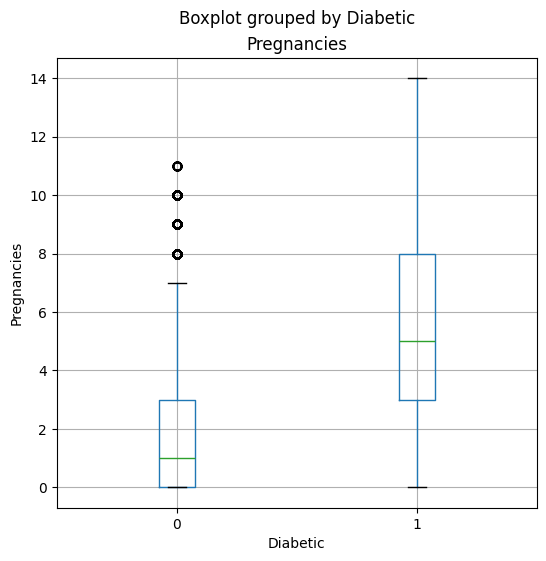

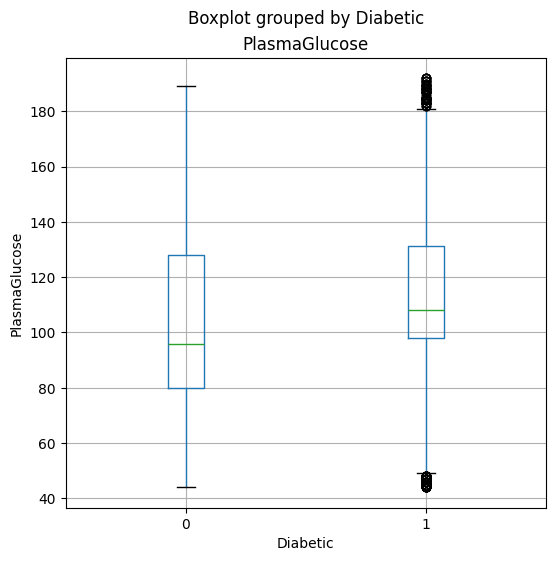

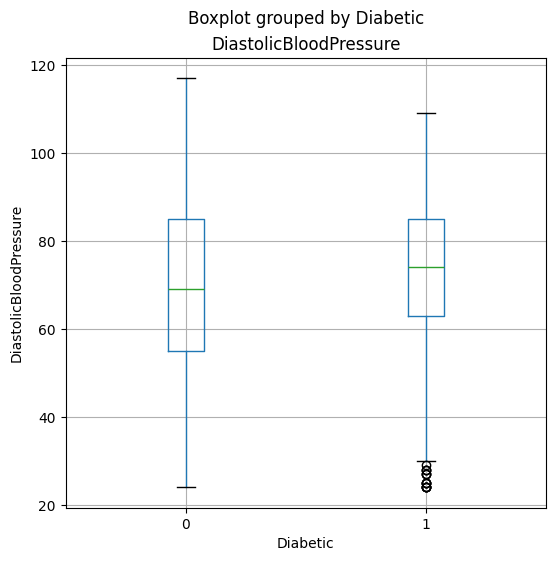

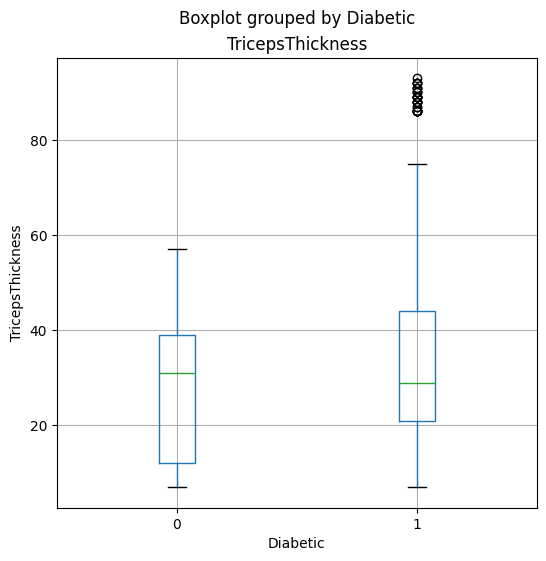

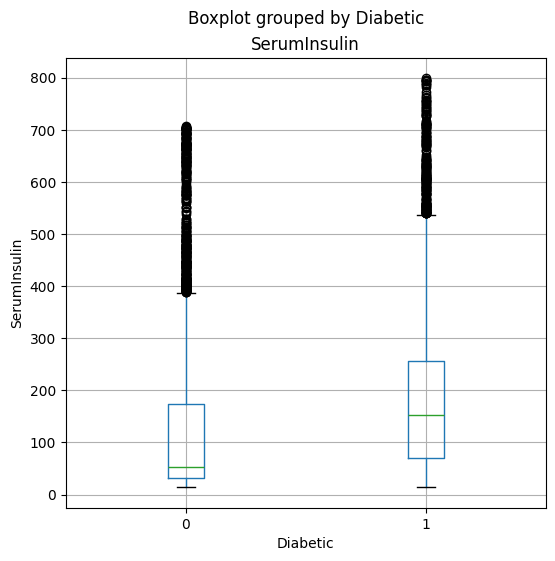

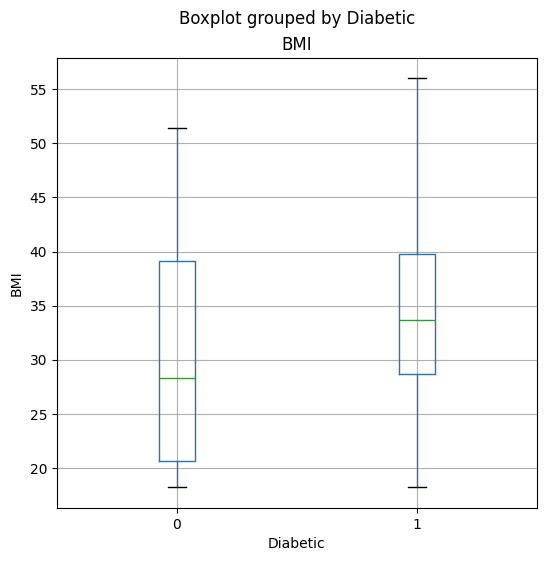

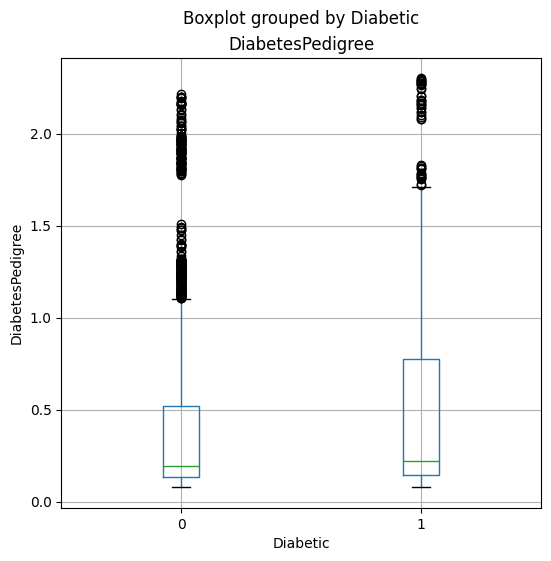

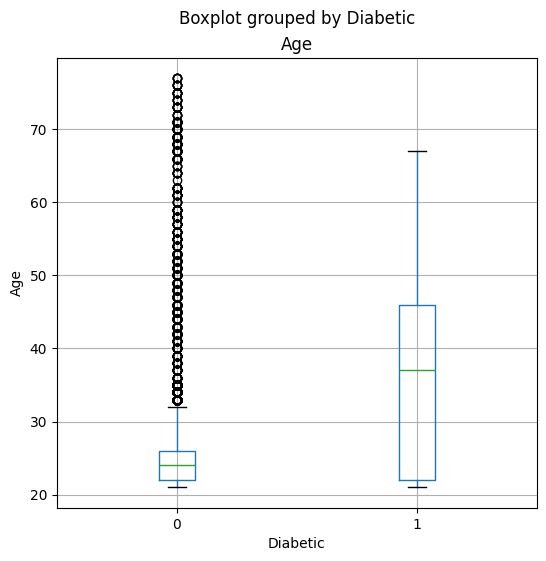

In [28]:
import matplotlib.pyplot as plt

for col in features:
    diabetes.boxplot(col, label, figsize=(6, 6))
    plt.title(col)
    plt.ylabel(col)
    plt.xlabel(label)

plt.show()

# Split the data

In [29]:
y

array([0, 0, 0, ..., 0, 0, 1], shape=(15000,))

In [30]:
from sklearn.model_selection import train_test_split

# split data 70%-30% into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.30, random_state=0)

print('Training cases: %d\nTest Cases: %d\n' % (X_train.shape[0], X_test.shape[0]))

Training cases: 10500
Test Cases: 4500



# Train and Evaluate a Binary Classification Model

In this example, we'll use _Logistic Regression_, which (despite its name) is a well-established algorithm for classification. In addition to the training features and labels, we'll need to set a _regularization_ parameter. This is used to counteract any bias in the sample, and help the model generalize well by avoiding _overfitting_ the model to the training data.

In [32]:
# Train the model
from sklearn.linear_model import LogisticRegression

# Set regularization rate
reg = 0.1

# train a logistic regression model on training set
model = LogisticRegression(C=1/reg, solver='liblinear')

# fit the training data
model.fit(X_train, y_train)

print(model)

LogisticRegression(C=10.0, solver='liblinear')


In [34]:
# Evaluate the model
predictions = model.predict(X_test)

print('Predicted labels: ', predictions)
print('Actual label: ', y_test)

Predicted labels:  [0 0 0 ... 0 1 0]
Actual label:  [0 0 1 ... 1 1 1]


# Check Evaluation Metrics

In [38]:
# Check accuracy
from sklearn.metrics import accuracy_score

print('Accuracy: {:.2f} %'.format(accuracy_score(y_test, predictions) * 100))

Accuracy: 78.93 %


# Metrics of Classification report

The classification report includes the following metrics for each class (0 and 1)

note that the header row may not line up with the values!

_Precision_: Of the predictions the model made for this class, what proportion were correct?

_Recall_: Out of all of the instances of this class in the test dataset, what proportion did the model identify?

_F1-Score_: An average metric that takes both precision and recall into account.

_Support_: How many instances of this class are there in the test dataset?

watch: https://www.youtube.com/watch?v=qWfzIYCvBqo

In [39]:
# Classification Report
from sklearn.metrics import classification_report

print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.81      0.88      0.85      2986
           1       0.72      0.60      0.66      1514

    accuracy                           0.79      4500
   macro avg       0.77      0.74      0.75      4500
weighted avg       0.78      0.79      0.78      4500




## 🔍 1. Per-Class Metrics

You have two classes:

* **Class `0`** (e.g., "negative")
* **Class `1`** (e.g., "positive")

| Metric        | Class 0 | Class 1 | Meaning                                                             |
| ------------- | ------- | ------- | ------------------------------------------------------------------- |
| **Precision** | 0.81    | 0.72    | How many predicted positives are actually correct? `TP / (TP + FP)` |
| **Recall**    | 0.88    | 0.60    | How many actual positives did the model catch? `TP / (TP + FN)`     |
| **F1-score**  | 0.85    | 0.66    | Harmonic mean of precision and recall. Best when both are balanced. |
| **Support**   | 2986    | 1514    | Number of actual samples of each class.                             |

---

## 📊 2. Overall Metrics

| Metric           | Meaning                                                                                                                                     |
| ---------------- | ------------------------------------------------------------------------------------------------------------------------------------------- |
| **Accuracy**     | `0.79` → Out of 4500 total samples, 79% were predicted correctly.                                                                           |
| **Macro Avg**    | Average of precision, recall, and F1 across classes **equally**. Doesn’t consider class imbalance.                                          |
| **Weighted Avg** | Average of precision, recall, and F1 **weighted by support**. So class 0 affects the score more because it has more samples (2986 vs 1514). |

---

## 💡 Interpretation

* Your model is **more accurate on class 0** than on class 1:

  * Class 0 has higher precision, recall, and F1.
* It’s likely that your dataset is **imbalanced** (more 0s than 1s).
* If class 1 is more important (e.g., detecting fraud, cancer, etc.), you may need to:

  * Use techniques like **SMOTE** or **class weights**,
  * Improve recall for class 1 (only 60% detected),
  * Try different models or hyperparameter tuning.

---

## ✅ Summary of Each Term:

| Term             | Description                                                  |
| ---------------- | ------------------------------------------------------------ |
| **Precision**    | How correct are the positive predictions?                    |
| **Recall**       | How many actual positives did we catch?                      |
| **F1-score**     | Tradeoff between precision and recall.                       |
| **Support**      | Total samples per class.                                     |
| **Accuracy**     | Overall correct predictions.                                 |
| **Macro avg**    | Average of metrics per class, unweighted.                    |
| **Weighted avg** | Average of metrics, weighted by number of samples per class. |
